## QUESTION 4

### We need to design a Kohonen self organizing map (SOM), which gives as an output some shades of color mapped over 100 by 100 grid of neurones. The training input of the SOM are 24 colors

In [1]:
# IMPORTING LIBRARIES

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# GENERATING THE DATA 

data= np.array([[255,0,0],[0,255,0],[0,0,255],[255,255,0],[0,255,255],[255,0,255],[128,0,0],[0,128,128],[128,0,128],[0,0,128],[165,42,42],[255,215,0],[128,128,0],[154,205,50],[173,255,47],[138,43,226],[148,0,211],[25,25,112],[0,0,139],[65,105,225],[255,165,0],[255,99,71],[139,0,0],[220,20,60]])

In [3]:
# Color code in chossen in order
'''
 	Red
    Lime
    blue
    Yellow
    Cyan / Aqua
    Magenta / Fuchsia
    Maroon
    teal
    purple
    navy
    brown
    gold
    olive
    yellow green
    green yellow
    blue violet
    dark violet
    midnight blue
    dark blue
    royal blue
    orange
    tomato
    dark read
    crimson
'''

'\n \tRed\n    Lime\n    blue\n    Yellow\n    Cyan / Aqua\n    Magenta / Fuchsia\n    Maroon\n    teal\n    purple\n    navy\n    brown\n    gold\n    olive\n    yellow green\n    green yellow\n    blue violet\n    dark violet\n    midnight blue\n    dark blue\n    royal blue\n    orange\n    tomato\n    dark read\n    crimson\n'

In [4]:
# NORMALIZING THE DATA
xmax, xmin = data.max(), data.min()
data= (data - xmin)/(xmax - xmin)

In [7]:
# CALCULATING THE NEIGHBOURS OF WINNING NEURON
def cal_neighbour(epoch,iteration,sigma_o,distance):
    sigma = sigma_o *(np.exp(-(epoch/iteration)))
    neigh_w = np.exp(-((distance)/(2*sigma*sigma)))
    
    return neigh_w

In [8]:
# DEFINES WINNING NEURON AND UPDATES THE WEIGHT OF THE NEIGHBOURS AND PLOTTING

def wining_neuron(w_m,input_data,iteration,sigma_o,coor_list):
    wn_array=np.array([])
    for epoch in range (iteration):
        for j in range (input_data.shape[0]):

            for i in range (w_m.shape[1]):
                wn= np.sum(np.square(w_m[:,i] - input_data[j,:]))
                wn_array= np.append(wn_array,wn)

            armin=np.argmin(wn_array)
            wn_array=np.array([])
    
            l_r = 0.8*np.exp(-(epoch/iteration))
 
    
            for dist in range(len(coor_list)):
              w_dist = np.sum((np.array(coor_list[dist])-np.array(coor_list[armin]))**2)
              neighbours= cal_neighbour(epoch,iteration,sigma_o,w_dist)

              w_m[:,dist] = w_m[:,dist]+(l_r*(data[j,:]-w_m[:,dist])*neighbours)

        if(epoch == 19 or epoch==39 or epoch ==99 or epoch==999):
          print("The plot after epoch ",epoch+1)
          x=w_m.T.reshape(100,100,3)
          plt.imshow(x)
          plt.show()

            
            
    return w_m

In [13]:
# INITIALIZING THE WEIGHTS RANDOMLY
weight_matrix= np.random.rand(3,10000)


In [15]:
# CREATING THE COORDINATE LIST FOR CALCULATING THE DISTANCE
xx=np.array([])
count=1
for i in range (weight_matrix.shape[1]):
    x= weight_matrix[:,i]
    x=count
    xx=np.append(xx,[[x]])
    count+=1
xx.resize(100,100)
coor_list=[]
for j in range (len(xx)):
    for k in range (len(xx[j])):
        coor_list.append([j,k])

The plot when radius is  1
The plot after epoch  20


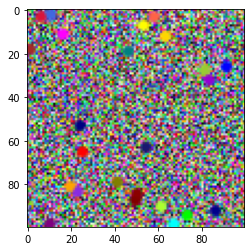

The plot after epoch  40


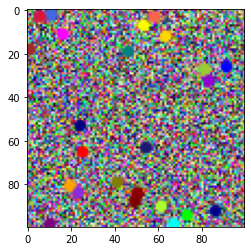

The plot after epoch  100


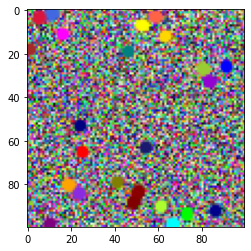

The plot after epoch  1000


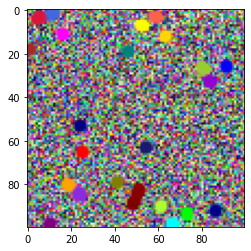

The plot when radius is  10
The plot after epoch  20


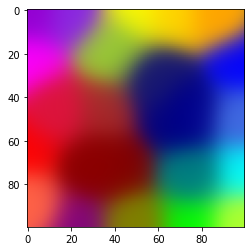

The plot after epoch  40


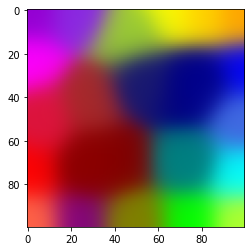

The plot after epoch  100


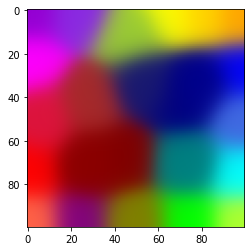

The plot after epoch  1000


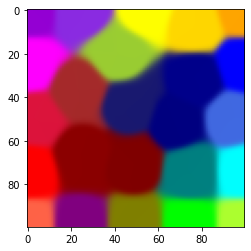

The plot when radius is  30
The plot after epoch  20


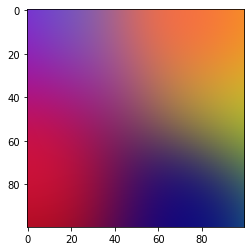

The plot after epoch  40


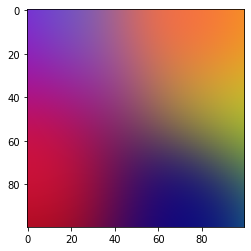

The plot after epoch  100


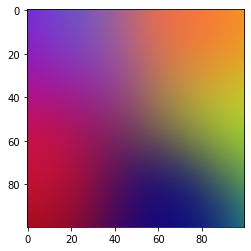

The plot after epoch  1000


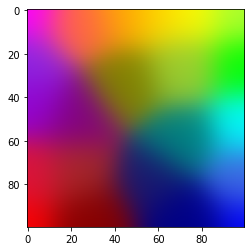

The plot when radius is  50
The plot after epoch  20


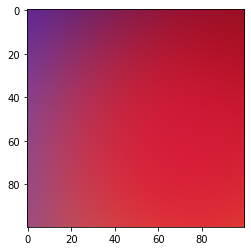

The plot after epoch  40


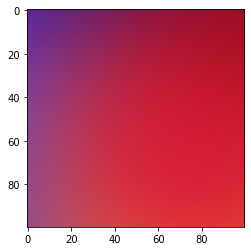

The plot after epoch  100


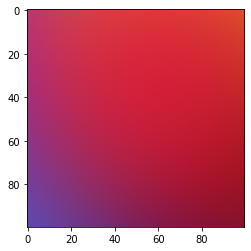

The plot after epoch  1000


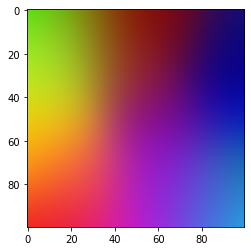

The plot when radius is  70
The plot after epoch  20


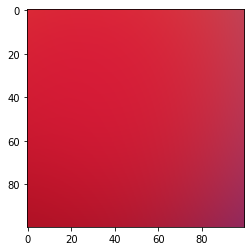

The plot after epoch  40


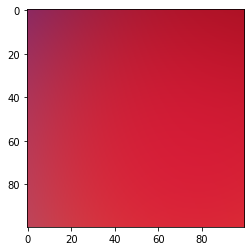

The plot after epoch  100


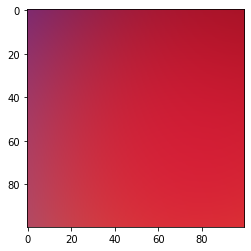

The plot after epoch  1000


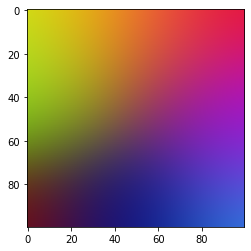

In [12]:
# RUNNING 1000 iteration with different radius values
radius=[1, 10, 30, 50,70]
for r in radius:
  print("The plot when radius is ",r)
  weight_test=wining_neuron(weight_matrix,data,1000,r,coor_list)

## BRIEF REPORT

self organizing maps (SOM) is mainly used to project multidimensional data onto lower dimensional subspaces where geometric relationships between points indicate their similarity. The two major features of SOMs are clustering and dimensionality reduction. Thus reduction in dimensionality will help us visualize the multi dimensional data. 

Initially a winning neuron is chosen and the weights of winning neuron are updated and its neighbour hood are determined using a gaussian function and it's weights are also updated.The neighborhood function's radius is  decremented over time so that the amount of "neighbors" decreases as training progresses. For similar training data points the same neighbourhood of the winning neuron is influenced thus forming a cluster.

The implementation result shows that when the radius is 1, the radius of the cluster formed is small hence the clusters doesn't overlap. It is seen from the formula that the learning rate and neighbour hood radius are decremented over time. For radius 1, even after 1000 epoch the clusters are far apart.

When the radius is 20 its seen, that clusters starts to spread, thus at the end of 1000 iteration for radius 20 almost all the training data points are clustered.

when the radius is higher than 20, there is a overlap between colours as the cluster radius has increased and at the end of 1000 epochs, depending upon the training data points, only the dominant colour shades are visible, thus giving a well converged map. 
